In [1]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


image_path = os.path.join(os.getcwd(), 'annotations')
xml_df = xml_to_csv(image_path)
xml_df.to_csv('Imagelabels.csv', index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [13]:
req_images = pd.read_csv('Imagelabels.csv')
fin_images = req_images.drop_duplicates(subset='filename', keep="last")

In [14]:
fin_images.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1667654926859.jpg,3072,4096,DIVYANSH,1481,1432,1804,1886
1,1668353078759.jpg,2304,1728,DIVYANSH,385,336,1010,1182
2,1668353118230.jpg,2400,3200,DIVYANSH,1214,455,1821,1169
3,1668353154680.jpg,2400,3200,DIVYANSH,996,416,1567,1219
4,1668353294055.jpg,2560,1920,DIVYANSH,1216,720,1480,1052


In [24]:
import cv2
import numpy as np
def generate_images():
    
    source_images = fin_images['filename'].to_list()
    
    images = []
   
    for i in source_images:
        path = 'annotations/'+i
        input_image = cv2.imread(path)
        input_image = cv2.resize(input_image,(96,96))
        images.append(input_image)
#         cv2.imwrite('img_t.jpg',input_image)
    
    images = np.array(images)
    print('images_shape:',images.shape)
    return images, source_images
model_input_images, source_images = generate_images()

images_shape: (84, 96, 96, 3)


In [15]:
fin_images.loc[:, 'width_ratio'] = fin_images['width'] / 96
fin_images.loc[:, 'height_ratio'] = fin_images['height'] / 96
fin_images.loc[:, 'xmin'] = fin_images['xmin'] / fin_images['width_ratio']
fin_images.loc[:, 'xmax'] = fin_images['xmax'] / fin_images['width_ratio']
fin_images.loc[:, 'ymin'] = fin_images['ymin'] / fin_images['height_ratio']
fin_images.loc[:, 'ymax'] = fin_images['ymax'] / fin_images['height_ratio']

C:\Users\whyis\AppData\Local\Temp\ipykernel_20064\3941047560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_images.loc[:, 'width_ratio'] = fin_images['width'] / 96
C:\Users\whyis\AppData\Local\Temp\ipykernel_20064\3941047560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_images.loc[:, 'height_ratio'] = fin_images['height'] / 96


In [16]:
fin_images #all values should be less than 96

,filename,width,height,class,xmin,ymin,xmax,ymax,width_ratio,height_ratio
0,1667654926859.jpg,3072,4096,DIVYANSH,46.281250,33.562500,56.375000,44.203125,32.000000,42.666667
1,1668353078759.jpg,2304,1728,DIVYANSH,16.041667,18.666667,42.083333,65.666667,24.000000,18.000000
2,1668353118230.jpg,2400,3200,DIVYANSH,48.560000,13.650000,72.840000,35.070000,25.000000,33.333333
3,1668353154680.jpg,2400,3200,DIVYANSH,39.840000,12.480000,62.680000,36.570000,25.000000,33.333333
4,1668353294055.jpg,2560,1920,DIVYANSH,45.600000,36.000000,55.500000,52.600000,26.666667,20.000000
...,...,...,...,...,...,...,...,...,...,...
117,images31.jpg,100,100,CLOUD,0.960000,28.800000,96.000000,45.120000,1.041667,1.041667
118,images5.jpg,100,100,SUN,33.600000,17.280000,66.240000,48.000000,1.041667,1.041667
119,images6.jpg,275,183,SUN,34.210909,29.377049,63.185455,64.000000,2.864583,1.906250
120,images8.jpg,100,100,SUN,25.920000,26.880000,72.960000,67.200000,1.041667,1.041667


In [26]:
def generate_keypoints():
    
    keypoint_features = []
    
    for i in source_images:
        try:
            print(i)
            image_name = i
            mask = fin_images[fin_images['filename'] == image_name]
            mask = mask.values.tolist()
            print(mask)
            keypoints = (mask[0][4:8])
            #print(keypoints)
            newList = [int(x) / 96 for x in keypoints]
            #print(newList)
            keypoint_features.append(newList)
        except:
            print('error !')
    keypoint_features = np.array(keypoint_features, dtype=float)    
    return keypoint_features
model_input_keypoints=generate_keypoints()

1667654926859.jpg
[['1667654926859.jpg', 3072, 4096, 'DIVYANSH', 46.28125, 33.5625, 56.375, 44.203125, 32.0, 42.666666666666664]]
1668353078759.jpg
[['1668353078759.jpg', 2304, 1728, 'DIVYANSH', 16.041666666666668, 18.666666666666668, 42.083333333333336, 65.66666666666667, 24.0, 18.0]]
1668353118230.jpg
[['1668353118230.jpg', 2400, 3200, 'DIVYANSH', 48.56, 13.649999999999999, 72.84, 35.07, 25.0, 33.333333333333336]]
1668353154680.jpg
[['1668353154680.jpg', 2400, 3200, 'DIVYANSH', 39.84, 12.479999999999999, 62.68, 36.57, 25.0, 33.333333333333336]]
1668353294055.jpg
[['1668353294055.jpg', 2560, 1920, 'DIVYANSH', 45.6, 36.0, 55.5, 52.6, 26.666666666666668, 20.0]]
1668353392538.jpg
[['1668353392538.jpg', 3072, 4096, 'DIVYANSH', 18.3125, 44.8359375, 29.96875, 54.9609375, 32.0, 42.666666666666664]]
1668353511458.jpg
[['1668353511458.jpg', 2304, 1728, 'DIVYANSH', 10.166666666666666, 21.77777777777778, 37.75, 66.94444444444444, 24.0, 18.0]]
1668353656817.jpg
[['1668353656817.jpg', 3198, 2400, 

# NEURAL NETWORK

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout

input_shape = (96,96,3)
no_of_keypoints = 4  #xmin, ymin, xmax, ymax
model = Sequential()
# Input dimensions: (None, 96, 96, 3)
model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=input_shape))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 96, 96, 32)
model.add(Conv2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input dimensions: (None, 48, 48, 32)
model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 48, 48, 64)
model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input dimensions: (None, 24, 24, 64)
model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 24, 24, 96)
model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input dimensions: (None, 12, 12, 96)
model.add(Conv2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 12, 12, 128)
model.add(Conv2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input dimensions: (None, 6, 6, 128)
model.add(Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 6, 6, 256)
model.add(Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input dimensions: (None, 3, 3, 256)
model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(Dropout(0.3))
model.add(Dense(4))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        864       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_2 (Bat  (None, 96, 96, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 96, 96, 32)        128       
 chNormalization)                                     

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='loss', patience=30, mode='min', baseline=None)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, min_lr=1e-15, mode='min', verbose=1)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(model_input_images, model_input_keypoints, epochs=500, batch_size=16, validation_split=0.15, callbacks=[earlyStopping])

Epoch 1/500


5/5 [==============================] - 5s 289ms/step - loss: 188.0630 - mse: 188.0630 - val_loss: 36.5838 - val_mse: 36.5838
Epoch 2/500
5/5 [==============================] - 1s 170ms/step - loss: 36.3393 - mse: 36.3393 - val_loss: 204.7662 - val_mse: 204.7662
Epoch 3/500
5/5 [==============================] - 1s 164ms/step - loss: 25.1733 - mse: 25.1733 - val_loss: 4359.1582 - val_mse: 4359.1582
Epoch 4/500
5/5 [==============================] - 1s 160ms/step - loss: 26.8918 - mse: 26.8918 - val_loss: 1594.4768 - val_mse: 1594.4768
Epoch 5/500
5/5 [==============================] - 1s 162ms/step - loss: 20.5669 - mse: 20.5669 - val_loss: 10110.5049 - val_mse: 10110.5049
Epoch 6/500
5/5 [==============================] - 1s 165ms/step - loss: 32.2533 - mse: 32.2533 - val_loss: 3793.7373 - val_mse: 3793.7373
Epoch 7/500
5/5 [==============================] - 1s 167ms/step - loss: 30.9423 - mse: 30.9423 - val_loss: 525.3373 - val_mse: 525.3373
Epoch 8/500
5/5 [============

Epoch 58/500
5/5 [==============================] - 1s 168ms/step - loss: 5.8797 - mse: 5.8797 - val_loss: 4.0453 - val_mse: 4.0453
Epoch 59/500
5/5 [==============================] - 1s 159ms/step - loss: 5.4704 - mse: 5.4704 - val_loss: 0.9314 - val_mse: 0.9314
Epoch 60/500
5/5 [==============================] - 1s 160ms/step - loss: 4.8370 - mse: 4.8370 - val_loss: 1.0595 - val_mse: 1.0595
Epoch 61/500
5/5 [==============================] - 1s 167ms/step - loss: 4.0750 - mse: 4.0750 - val_loss: 1.5731 - val_mse: 1.5731
Epoch 62/500
5/5 [==============================] - 1s 167ms/step - loss: 5.4308 - mse: 5.4308 - val_loss: 1.1796 - val_mse: 1.1796
Epoch 63/500
5/5 [==============================] - 1s 168ms/step - loss: 4.6432 - mse: 4.6432 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 64/500
5/5 [==============================] - 1s 161ms/step - loss: 5.5787 - mse: 5.5787 - val_loss: 1.1739 - val_mse: 1.1739
Epoch 65/500
5/5 [==============================] - 1s 164ms/step - loss: 3.

Epoch 120/500
5/5 [==============================] - 1s 190ms/step - loss: 2.0879 - mse: 2.0879 - val_loss: 4.7372 - val_mse: 4.7372
Epoch 121/500
5/5 [==============================] - 1s 189ms/step - loss: 2.3399 - mse: 2.3399 - val_loss: 2.8186 - val_mse: 2.8186
Epoch 122/500
5/5 [==============================] - 1s 192ms/step - loss: 1.8360 - mse: 1.8360 - val_loss: 1.8459 - val_mse: 1.8459
Epoch 123/500
5/5 [==============================] - 1s 184ms/step - loss: 1.4662 - mse: 1.4662 - val_loss: 3.1929 - val_mse: 3.1929
Epoch 124/500
5/5 [==============================] - 1s 202ms/step - loss: 1.6098 - mse: 1.6098 - val_loss: 2.4648 - val_mse: 2.4648
Epoch 125/500
5/5 [==============================] - 1s 186ms/step - loss: 1.5072 - mse: 1.5072 - val_loss: 1.4991 - val_mse: 1.4991
Epoch 126/500
5/5 [==============================] - 1s 189ms/step - loss: 1.4167 - mse: 1.4167 - val_loss: 4.1587 - val_mse: 4.1587
Epoch 127/500
5/5 [==============================] - 1s 189ms/step - 

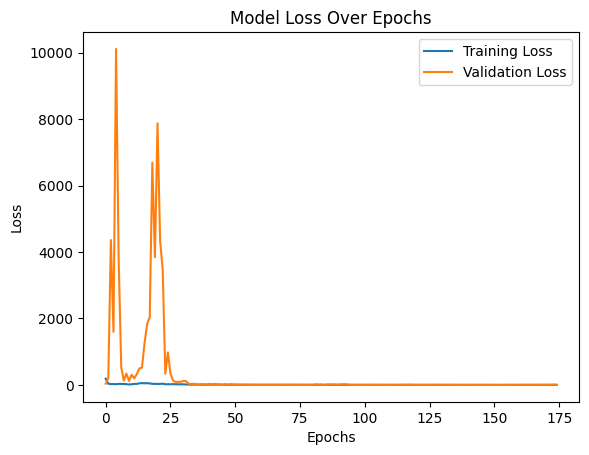

In [46]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
image_test = "image4.jpg"
test_image = cv2.imread(image_test)
test_image = cv2.resize(test_image,(96,96))
cv2.imwrite('image4.jpg',test_image)
images = np.array(test_image)/255.0
print(images.shape)
test=np.expand_dims(images,axis=0)
print(test.shape)
ans = model.predict(test)
print(abs(ans))
ans = abs(ans * 96)  #denormalizing
print(ans)

(96, 96, 3)
(1, 96, 96, 3)
1/1 [==============================] - 0s 40ms/step
[[2.1736379  0.10309479 2.8732378  2.5297203 ]]
[[208.66924   9.8971  275.83084 242.85315]]


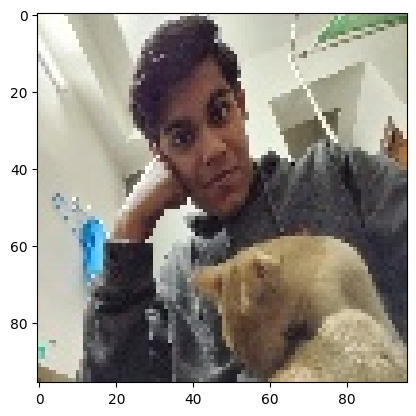

In [52]:
# test_image = cv2.imread('image1.jpg')
# test_image = cv2.resize(test_image,(96,96))
# out = cv2.rectangle(test_image,(ans[0][0],ans[0][1]),(ans[0][2],ans[0][3]),(255,0,0), 2)
# plt.imshow(out)
# cv2.imwrite('image1.jpg',out)
import matplotlib.pyplot as plt
test_image = cv2.imread('image4.jpg')
test_image = cv2.resize(test_image, (96, 96))

# Assuming 'ans' contains the correct coordinates (xmin, ymin, xmax, ymax)
rectangle_color = (255, 0, 0)  # RGB color for the rectangle (blue in this case)
thickness = 2

if ans is not None and len(ans) > 0:
    # Extracting coordinates and converting to integers
    pt1 = (int(ans[0][0]), int(ans[0][1]))
    pt2 = (int(ans[0][2]), int(ans[0][3]))

    # Draw rectangle
    out = cv2.rectangle(test_image, pt1, pt2, rectangle_color, thickness)
    out_rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(out_rgb)
    plt.show()

    # Save the modified image
    cv2.imwrite('image3.jpg', out)
else:
    print("No coordinates provided.")